In [1]:
'''EXPLOARTORY DATA ANALYSIS'''

'EXPLOARTORY DATA ANALYSIS'

In [2]:
'''CHECKLIST'''
#WITH TIME I WILL ENTER VALUES FOR THE LINES BELOW
####################################################
#FORM ANALYSIS 
##Target identification => SARS-Cov-2 exam result
##Columns and row quantity => init(5644, 111)
##Variable types => float, object
##NaN values identification => a lot, see .heatmap and .isna
####################################################
#BACKGROUND ANALYSIS
##Target visualisation 
###=> 10% positive cases (5086p vs 558n)

##Different variable comprehension 
###=> quantitatives: +/- standardized values
###=> qualitatives: binarized values (1/0)

##Features identification and visualisation
###=> see notes step-by-step
##Outliers identification
###=> negligible quantity of outliers 

'CHECKLIST'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
plt.style.use('dark_background')

____________________________________________________________________________________
DATAFRAME SHAPE:  (5644, 111)
VALUE TYPES AND QUANTITIES:  float64    70
object     37
int64       4
dtype: int64
____________________________________________________________________________________


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

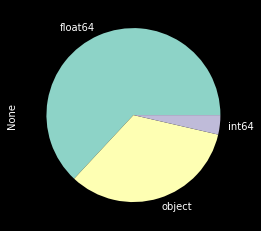

In [4]:
data = pd.read_excel('/kaggle/input/covid19/dataset.xlsx')
#pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
df = data.copy()
print('____________________________________________________________________________________')
print('DATAFRAME SHAPE: ',df.shape)
print('VALUE TYPES AND QUANTITIES: ', df.dtypes.value_counts())
print('____________________________________________________________________________________')
#print(df.describe())
df.dtypes.value_counts().plot.pie()
df

<AxesSubplot:>

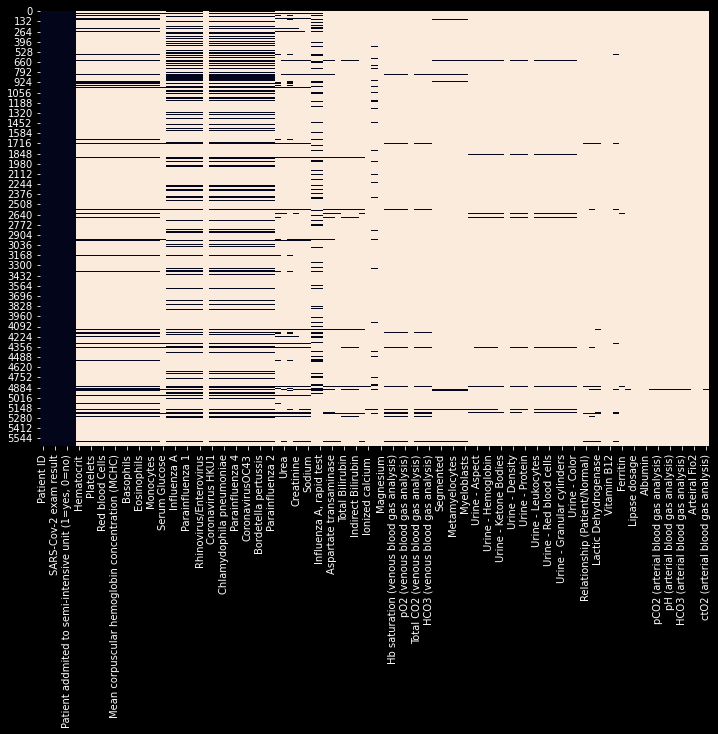

In [5]:
#visualizing the Na values 
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False)

In [6]:
#under this cell, we see the % of all NaN values
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

In [7]:
#eliminate all those bad columns
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.90]]
df = df.drop(['Patient ID'], axis=1)
df.shape

(5644, 38)

In [8]:
df['SARS-Cov-2 exam result'].value_counts()
#we distinguish ~10% of positive cases

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

array([[<AxesSubplot:title={'center':'Hematocrit'}>,
        <AxesSubplot:title={'center':'Hemoglobin'}>,
        <AxesSubplot:title={'center':'Platelets'}>,
        <AxesSubplot:title={'center':'Mean platelet volume '}>],
       [<AxesSubplot:title={'center':'Red blood Cells'}>,
        <AxesSubplot:title={'center':'Lymphocytes'}>,
        <AxesSubplot:title={'center':'Mean corpuscular hemoglobin concentration\xa0(MCHC)'}>,
        <AxesSubplot:title={'center':'Leukocytes'}>],
       [<AxesSubplot:title={'center':'Basophils'}>,
        <AxesSubplot:title={'center':'Mean corpuscular hemoglobin (MCH)'}>,
        <AxesSubplot:title={'center':'Eosinophils'}>,
        <AxesSubplot:title={'center':'Mean corpuscular volume (MCV)'}>],
       [<AxesSubplot:title={'center':'Monocytes'}>,
        <AxesSubplot:title={'center':'Red blood cell distribution width (RDW)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

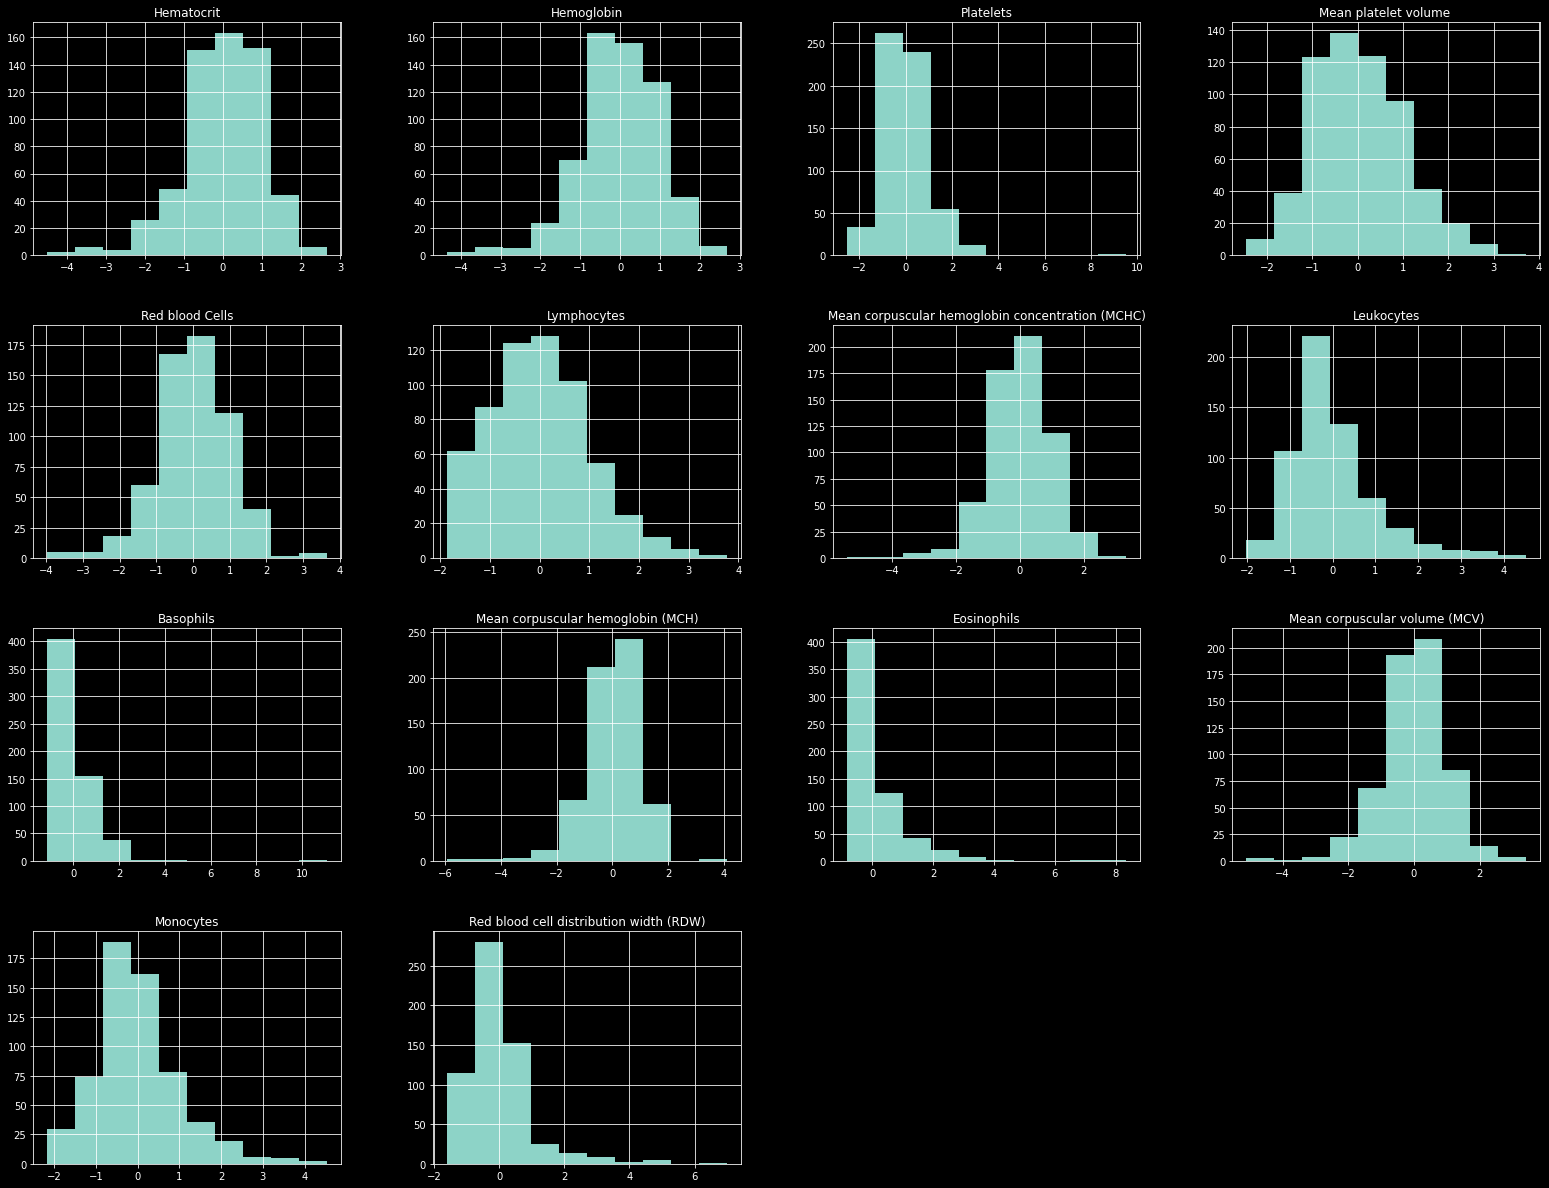

In [9]:
df.select_dtypes('float').hist(figsize=(27, 21))

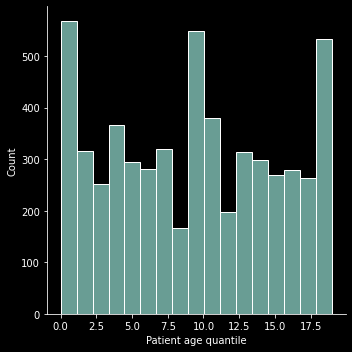

In [10]:
#we visualize patient age quantile bc it was not a float type
sns.displot(df['Patient age quantile'])

In [11]:
#next, we try to search signs for qualitative variables
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
#here, Parainfluenza 2 has only values NaN and not_detected, so it serves no purpose
df = df.drop('Parainfluenza 2', axis=1)

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

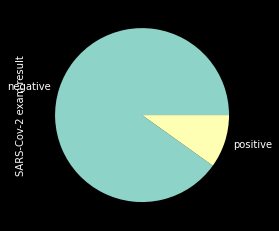

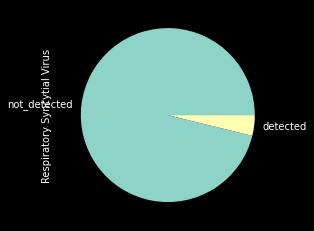

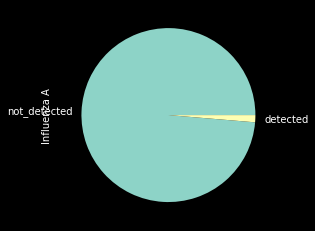

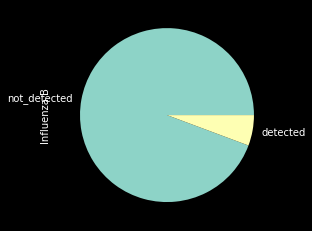

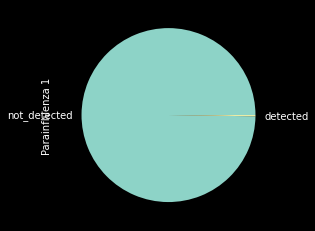

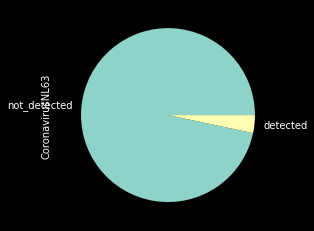

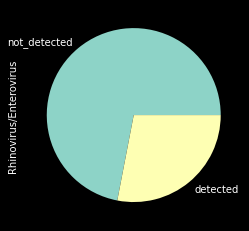

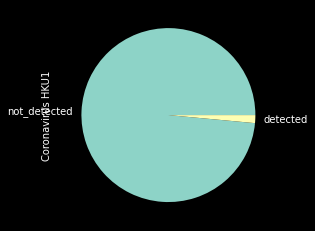

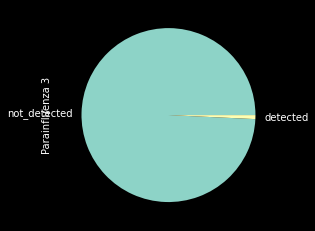

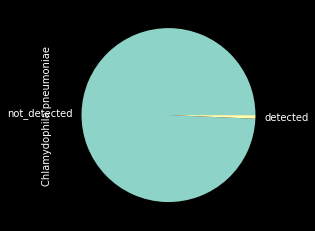

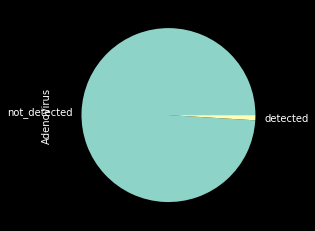

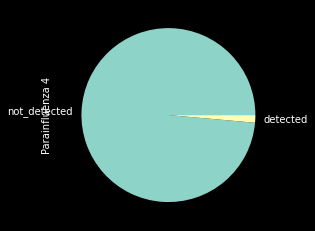

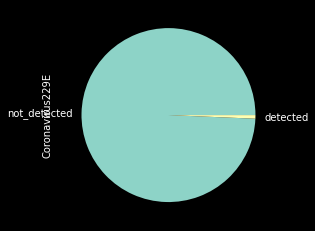

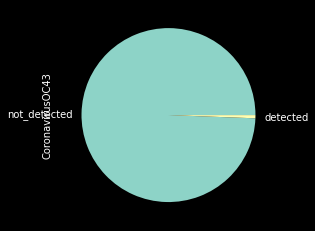

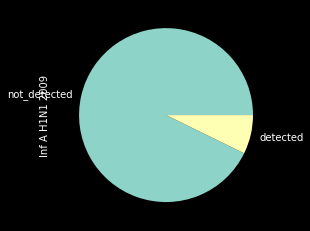

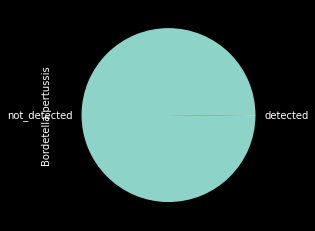

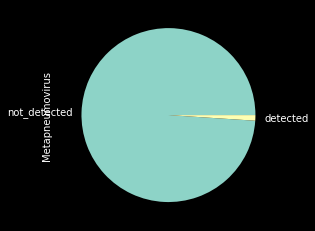

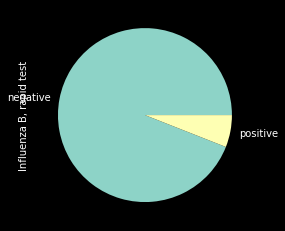

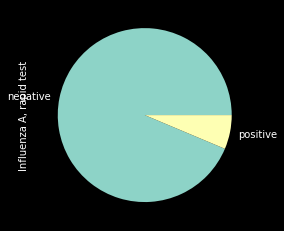

In [12]:
for i in df.select_dtypes('object'):
    plt.figure()
    df[i].value_counts().plot.pie()

In [13]:
#ease the process
pos_df = df[df['SARS-Cov-2 exam result'] == 'positive']
neg_df = df[df['SARS-Cov-2 exam result'] == 'negative']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

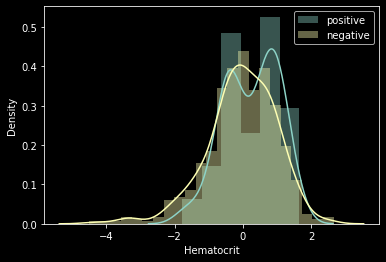

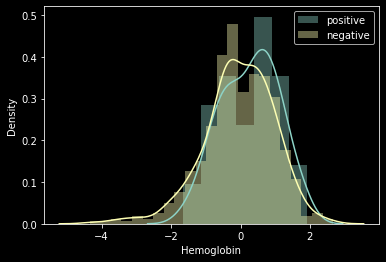

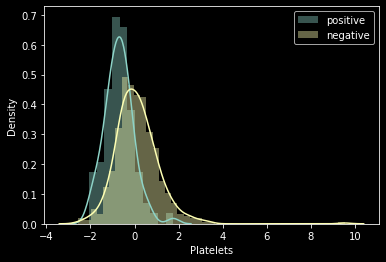

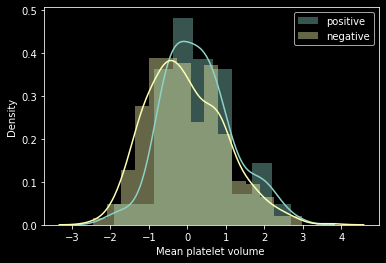

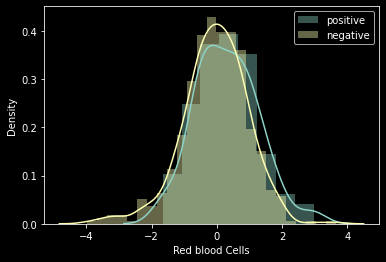

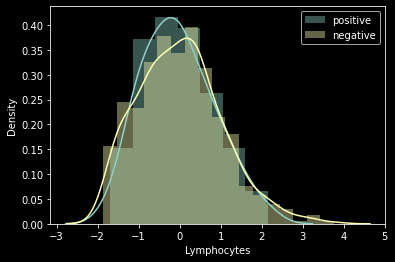

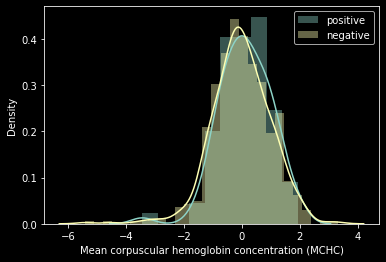

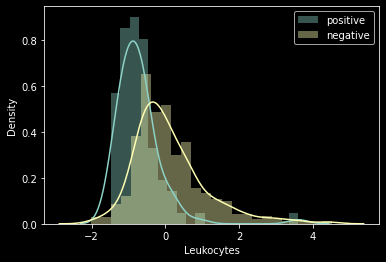

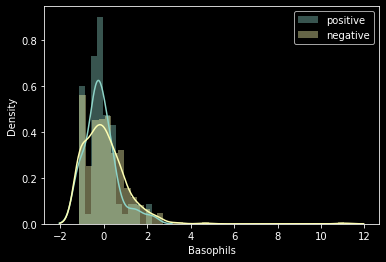

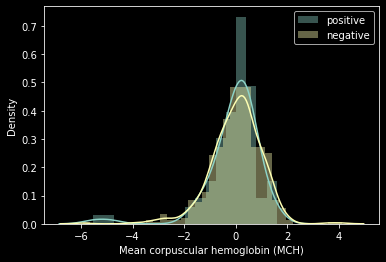

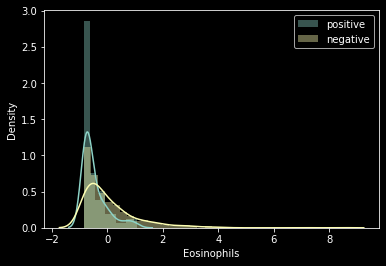

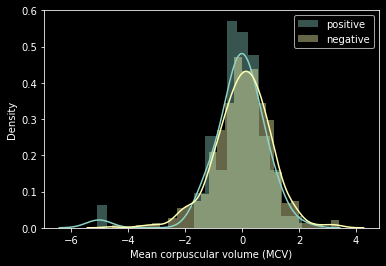

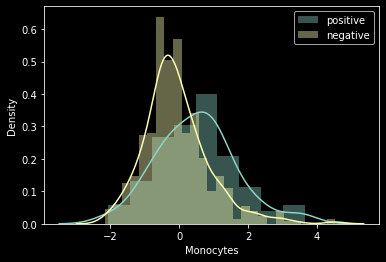

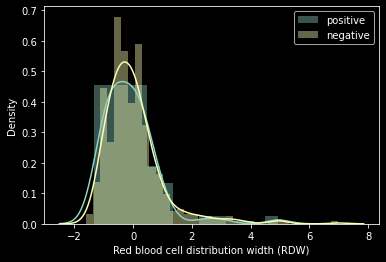

In [14]:
#we identified blood test people
missing_rate = df.isna().sum()/df.shape[0]
blood_col = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]
viral_col = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]
for i in blood_col:
    plt.figure()
    sns.distplot(pos_df[i], label='positive')
    sns.distplot(neg_df[i], label='negative')
    plt.legend()
#for the histograms below, positive and negative courbes seem to be
#the same, EXCEPT Platelets, Leukocytes and Monocytes

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

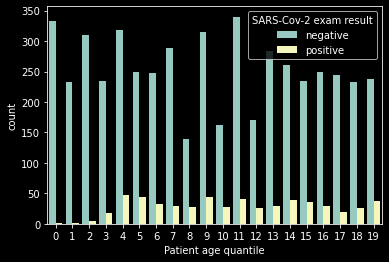

In [15]:
sns.countplot(x='Patient age quantile',
              hue='SARS-Cov-2 exam result', data=df)
#the age seems not matter to our observations, everybody is concerned

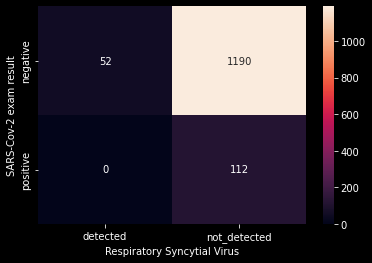

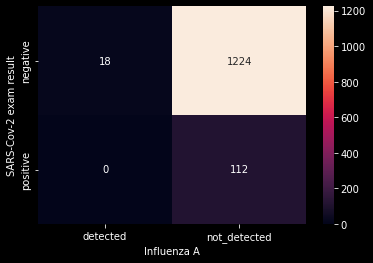

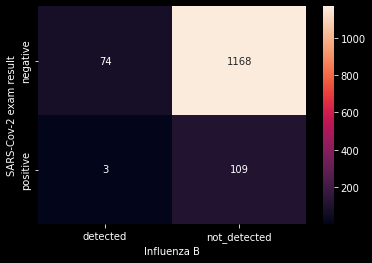

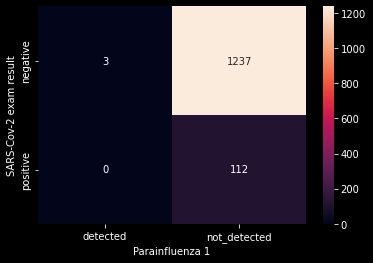

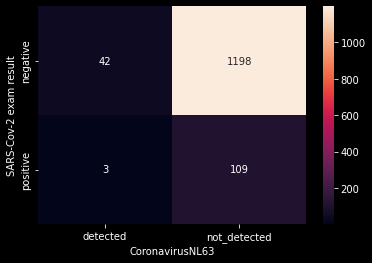

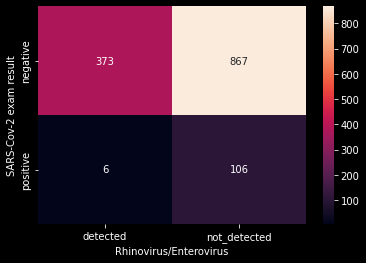

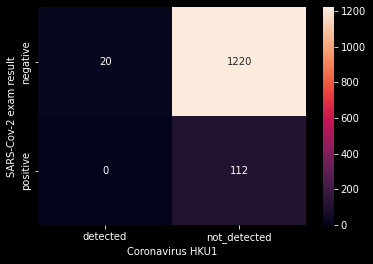

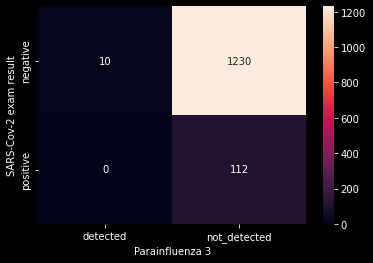

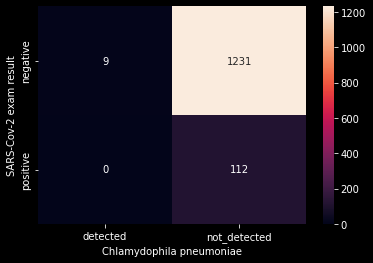

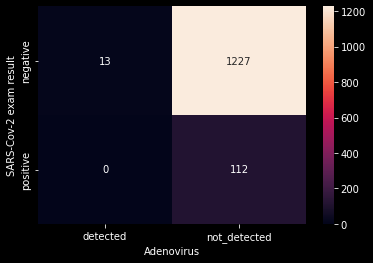

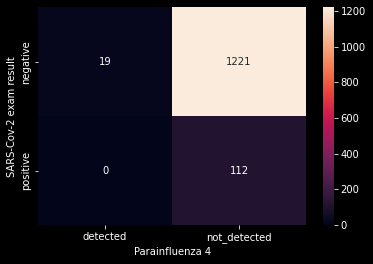

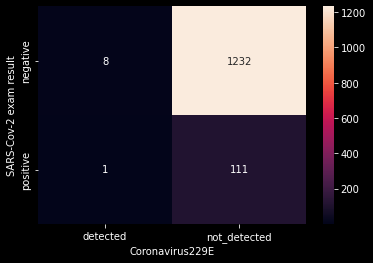

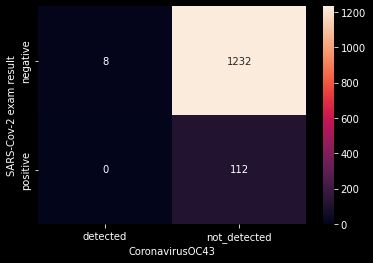

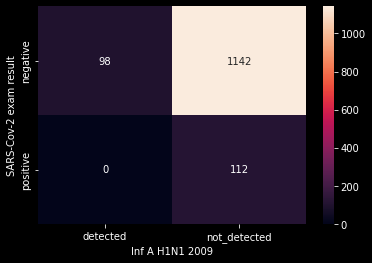

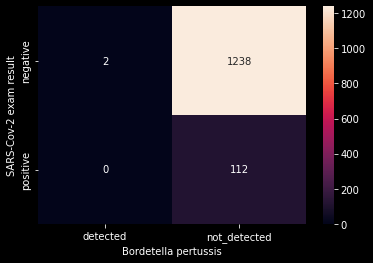

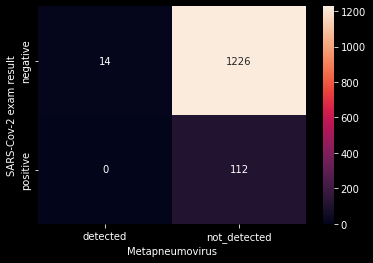

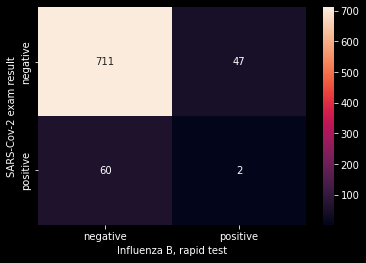

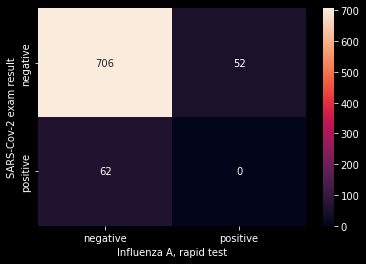

In [16]:
#we may proceed to crosstab method to see if there are some correlations
for i in viral_col:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],
                            df[i]), annot=True, fmt='d')
#once again, rhinovirus tableau is interesting to observe

In [17]:
'''ADVANCED ANALYSIS'''
#now that we seen different correalations between the target and the
#variables, we may work on corr between all variables

'ADVANCED ANALYSIS'

<AxesSubplot:>

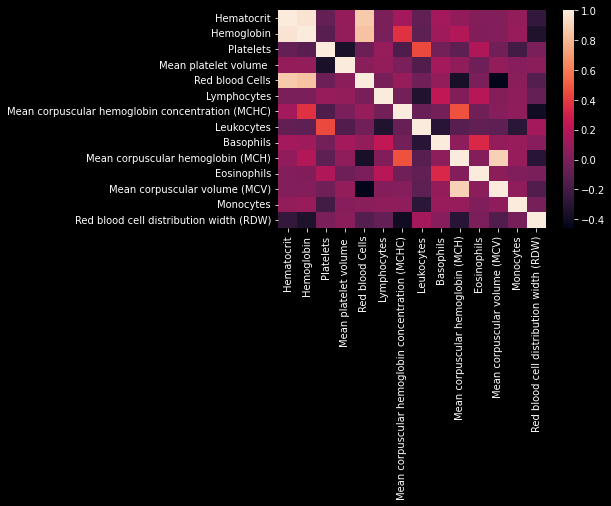

In [18]:
sns.heatmap(df[blood_col].corr())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

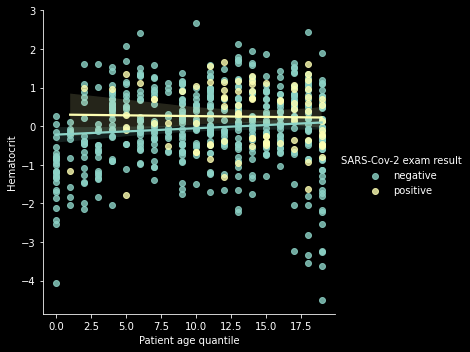

<Figure size 432x288 with 0 Axes>

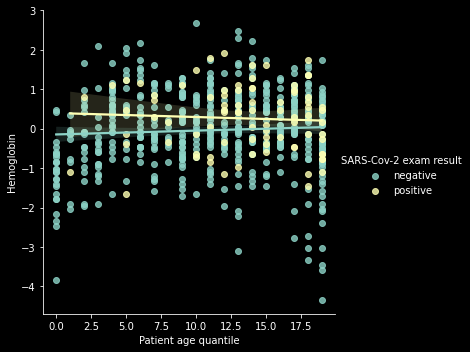

<Figure size 432x288 with 0 Axes>

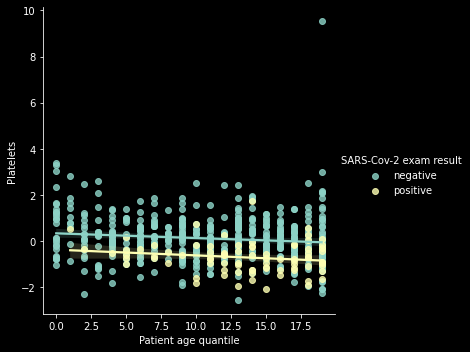

<Figure size 432x288 with 0 Axes>

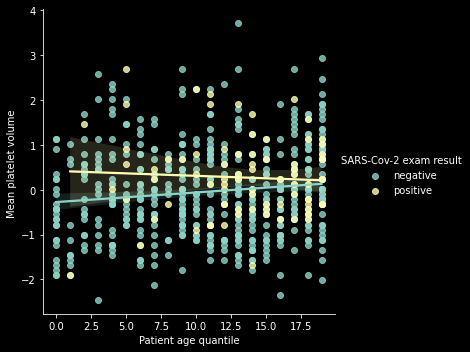

<Figure size 432x288 with 0 Axes>

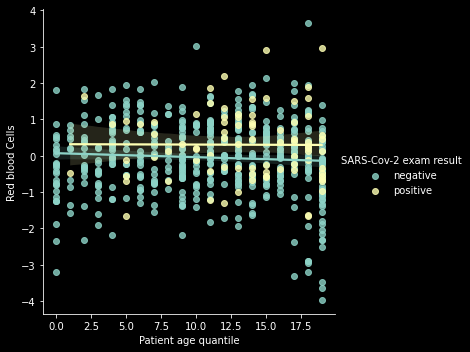

<Figure size 432x288 with 0 Axes>

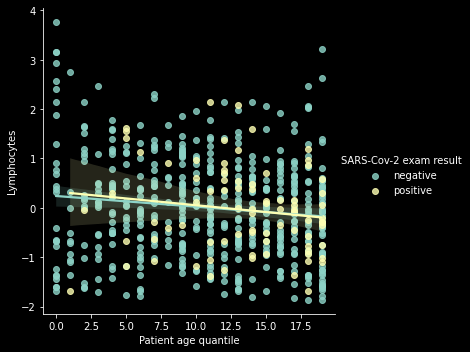

<Figure size 432x288 with 0 Axes>

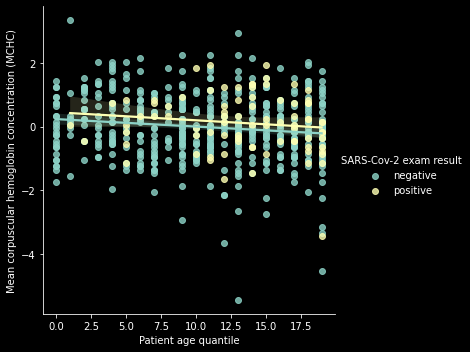

<Figure size 432x288 with 0 Axes>

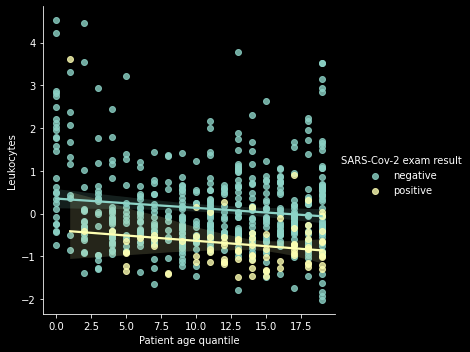

<Figure size 432x288 with 0 Axes>

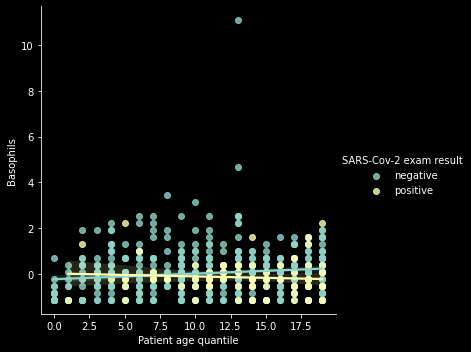

<Figure size 432x288 with 0 Axes>

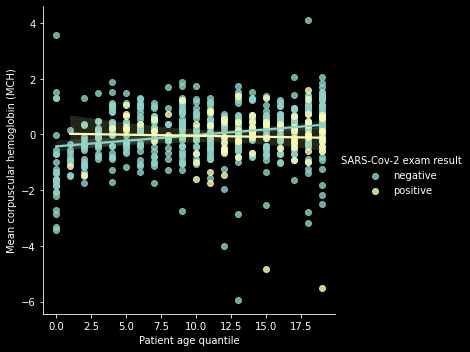

<Figure size 432x288 with 0 Axes>

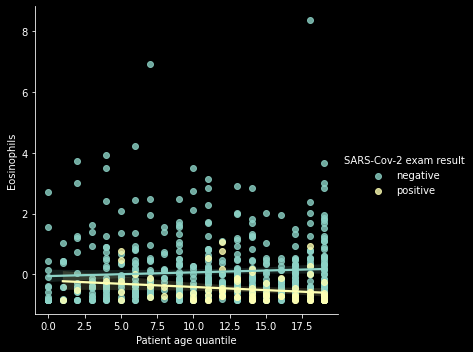

<Figure size 432x288 with 0 Axes>

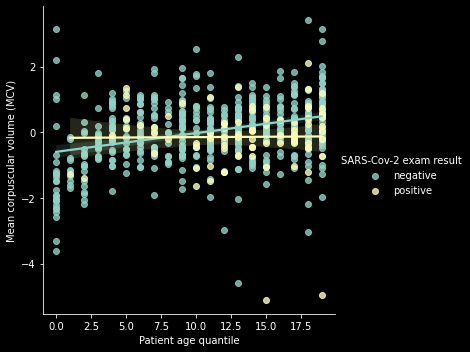

<Figure size 432x288 with 0 Axes>

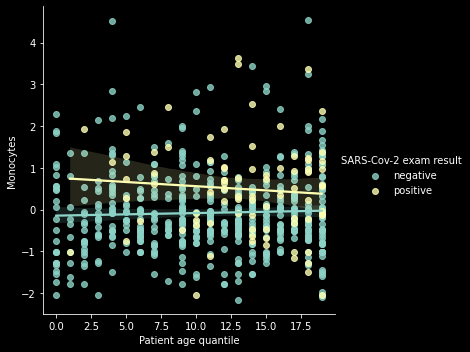

<Figure size 432x288 with 0 Axes>

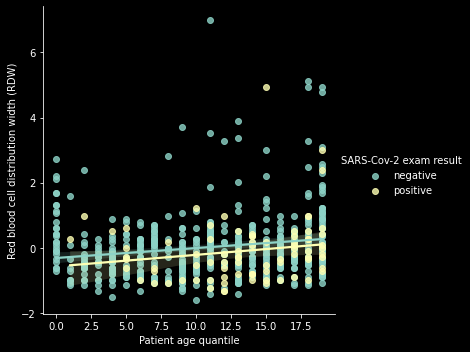

In [19]:
for i in blood_col:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=i, hue='SARS-Cov-2 exam result', data=df)  

In [20]:
df.corr()['Patient age quantile'].sort_values()
#so blood data and age seem to have no correlation, again (max=0.28)

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [21]:
#research on internet: rapid test is a bad test for both Influenza A/B
print(pd.crosstab(df['Influenza A'], df['Influenza A, rapid test']))
print('___________________________________________')
print(pd.crosstab(df['Influenza B'], df['Influenza B, rapid test']))
#with tableau, we confirm the hypothesis

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15
___________________________________________
Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4


<AxesSubplot:>

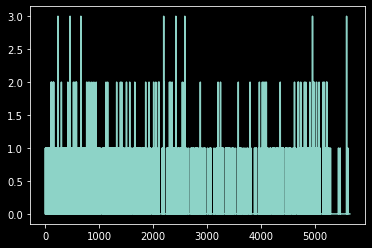

In [22]:
#now we watch for relation between illnesses and blood types
np.sum(df[viral_col[:-2]] == 'detected', axis=1).plot()

In [23]:
df['is ill'] = np.sum(df[viral_col[:-2]] == 'detected', axis=1) >= 1
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",is ill
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

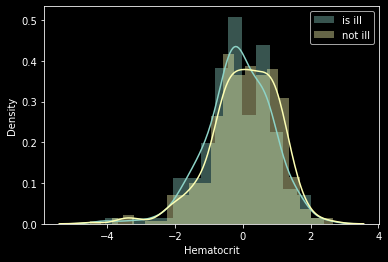

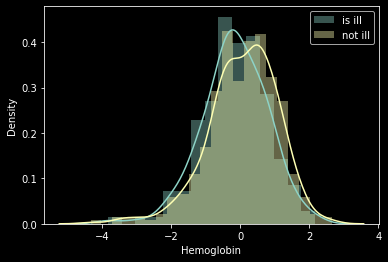

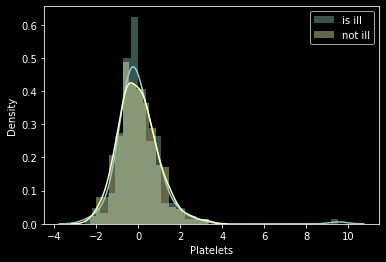

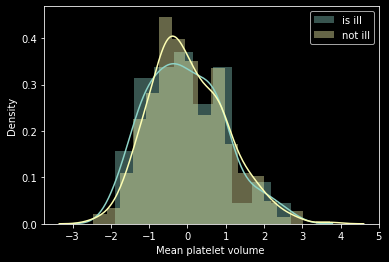

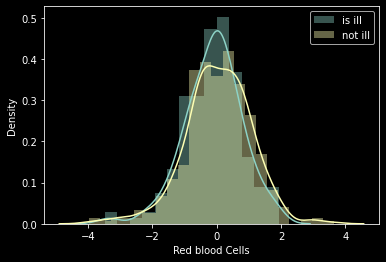

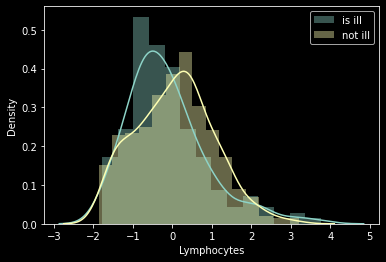

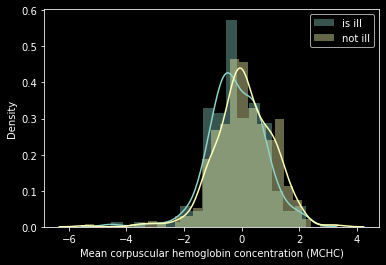

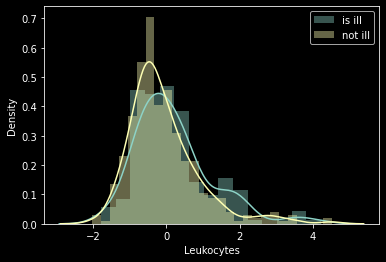

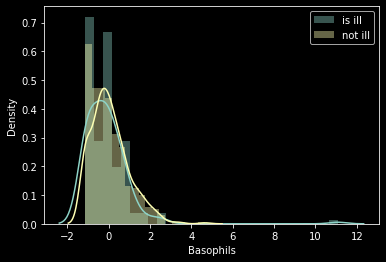

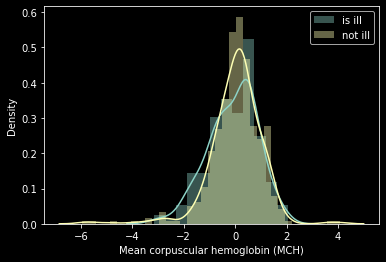

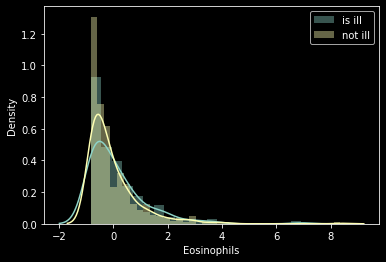

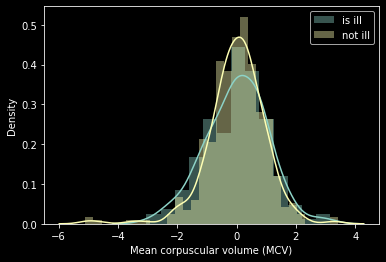

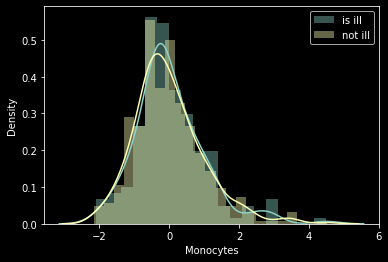

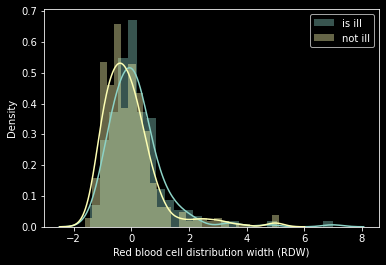

In [24]:
ill_df = df[df['is ill'] == True]
not_ill_df = df[df['is ill'] == False]
for i in blood_col:
    plt.figure()
    sns.distplot(ill_df[i], label='is ill')
    sns.distplot(not_ill_df[i], label='not ill')
    plt.legend()

#blood rates do not vary for illnesses, but we remember that it varied
#for covid, so the correlation we supposed for covid and blood rates are an interesting variable to use for our future model

In [25]:
def to_hospital(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'monitoring'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive care'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensive care'
    else:
        return 'no data'

In [26]:
df['status'] = df.apply(to_hospital, axis=1)
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",is ill,status
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no data
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True,no data
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no data
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no data
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no data
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no data
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no data
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,no data


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

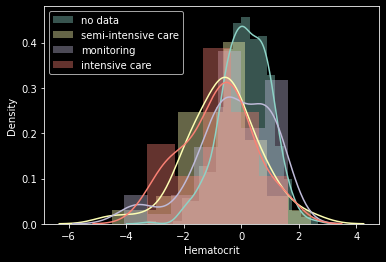

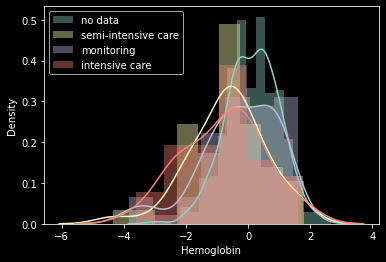

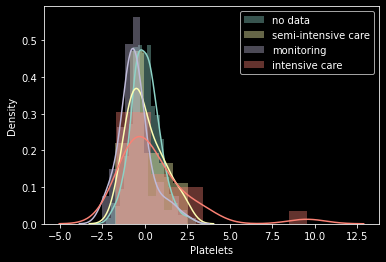

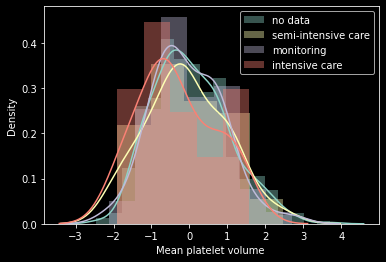

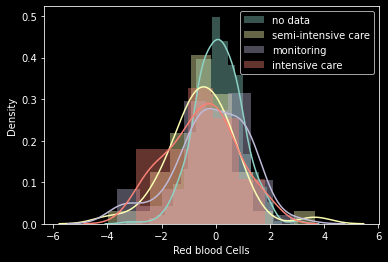

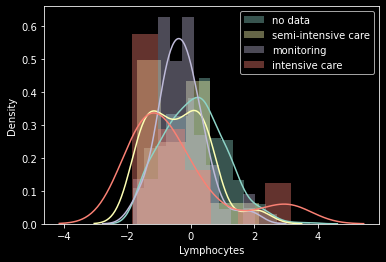

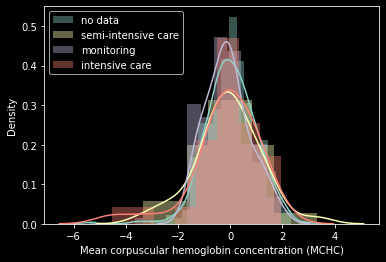

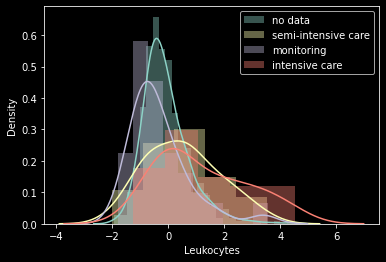

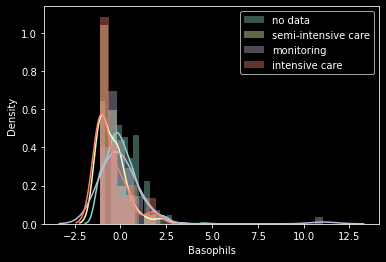

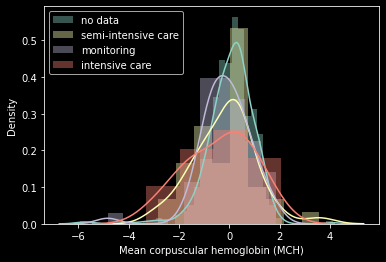

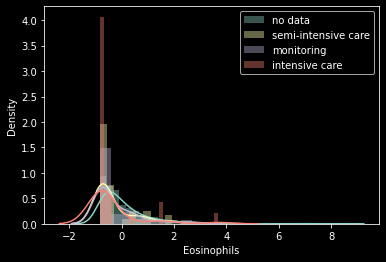

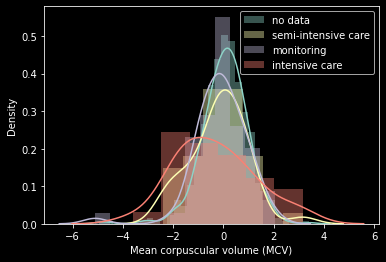

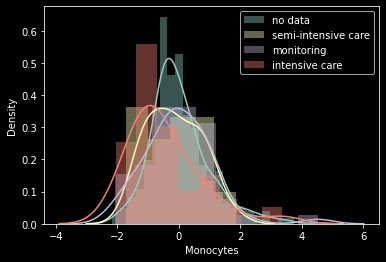

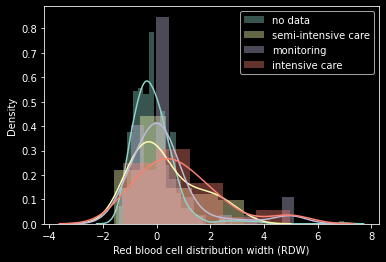

In [27]:
for col in blood_col:
    plt.figure()
    for categ in df['status'].unique():
        sns.distplot(df[df['status']==categ][col], label=categ)
    plt.legend()

In [28]:
df_viral = df[viral_col[:-2]]
df_viral['covid'] = df['SARS-Cov-2 exam result']
df_viral.dropna()['covid'].value_counts(normalize=True)
#we will have 1350(0.92p/0.08n) non-NaN values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [29]:
df_blood = df[blood_col]
df_blood['covid'] = df['SARS-Cov-2 exam result']
df_blood.dropna()['covid'].value_counts(normalize=True)
#we will have 600(0.87p/0.13n) non-NaN values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [30]:
'''CONCLUSION EDA'''
#we distinguish ~10% of positive cases
#the age seems not matter to our observations, everybody is concerned
#rhinovirus is noted as an illness correlated to covid (hypthesis)
#blood rates X age seem to have no correlation
#Rapid test is a bad test for both Influenza A/B as well as Parainfluenza column. we eliminate them for the next part
#blood rates X illnesses seem to have no correlation
#blood rates(Leukocytes, Monocytes, Platelets) are correlated to covid (hyphotesis)

'CONCLUSION EDA'